In [1]:
import pandas as pd # Allows for further data manipulation and analysis
import numpy as np # Provides ways to work with large multidimensional arrays
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

In [8]:
# Function that downloads a dataframe as saves it as csv by providing a ticker and starting date
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    
    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    # Reads data into a dataframe
    df = web.DataReader(ticker, 'yahoo', start, end)
    
    # Save data to a CSV file
    df.to_csv("/Users/Mustapha/Desktop/New_folder_(2)/Python4Finance-main/Python4Finance-main" + ticker + '.csv')
    return df

In [12]:
# save_to_csv_from_yahoo('UDMY', 2021, 1, 1, 2022, 1, 1)

In [15]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv("/Users/Mustapha/Desktop/New_folder_(2)/Python4Finance-main/Python4Finance-main" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [50]:
# Add daily returns to dataframe
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
    df.to_csv("/Users/Mustapha/Desktop/New_folder_(2)/Python4Finance-main/Python4Finance-main/" + ticker + '.csv')   
    return df  

In [41]:
# Returns total returns over time
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    #df['Date'] = pd.to_datetime(df['Date'])
    
    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['daily_return'].mean()
    
    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)

In [24]:
# Receives a ticker and the date range for which to plot using matplotlib finance
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        df = pd.read_csv("/Users/Mustapha/Desktop/New_folder_(2)/Python4Finance-main/Python4Finance-main" + ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

In [25]:
# Simple price plot
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv("/Users/Mustapha/Desktop/New_folder_(2)/Python4Finance-main/Python4Finance-main" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')

In [21]:
# Download multiple stocks as saves as csv
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

In [22]:
# Merge multiple stocks(dataframes) in one dataframe by column name
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
    return mult_df

In [23]:
# Get changing value of investment using multiple stocks
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

In [24]:
# Receives the dataframe with the Adj Close data along with the stock ticker
# Returns the mean and standard deviation associated with the ticker
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [25]:
# Receives the dataframe with the stock ticker as the column name and
# the Adj Close values as the column data and returns the mean and 
# standard deviation
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

In [51]:
# Testing the function
# udmy= save_to_csv_from_yahoo('UDMY', 2021, 1, 1, 2022, 1, 1)

udmy = get_df_from_csv('udmy')

add_daily_return_to_df(udmy, 'UDMY')
# udmy

tot_ret = get_return_defined_time(udmy, 2021, 1, 1, 2022, 1, 1)
print('Total Return', tot_ret)

Total Return -0.3023448736293357


In [48]:
# Total returns from coursera stock 
# Testing the function
# udmy= save_to_csv_from_yahoo('UDMY', 2021, 1, 1, 2022, 1, 1)

cour = get_df_from_csv('COUR')

add_daily_return_to_df(cour, 'COUR')
# udmy

tot_ret = get_return_defined_time(cour, 2021, 1, 1, 2022, 1, 1)
print('Total Return', tot_ret)

PermissionError: [Errno 13] Permission denied: '/Users/Mustapha/Desktop/New_folder_(2)/Python4Finance-main/Python4Finance-main/stock list/stock_copy/COUR.csv'

Stock: UDMY Mean:   16.34 Standard deviation: 5.74
Coefficient of Variation: 0.35148897251521116

Stock: COUR Mean:   22.67 Standard deviation: 5.48
Coefficient of Variation: 0.24160711135657084



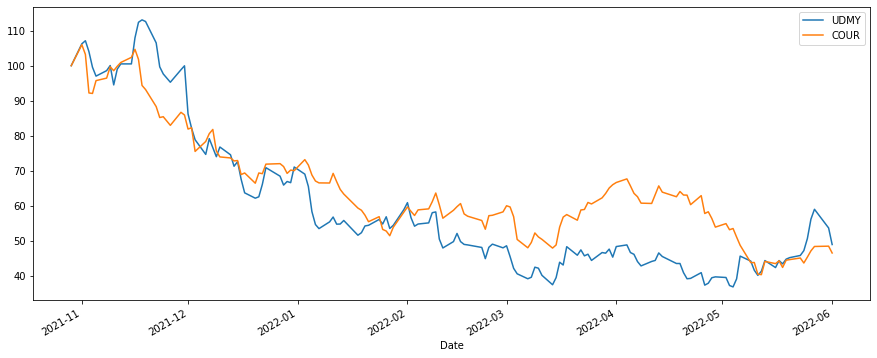

In [27]:
# Testing the function

# mplfinance_plot('AMZN','ohlc',2020, 1, 1, 2021, 1, 1)
# price_plot('AMZN',2020, 1, 1, 2021, 1, 1)

# Download multiple stocks
# tickers = ['UDMY', 'COUR']
# download_multiple_stocks(2021, 1, 1, 2022, 1, 1, *tickers)

# Merge dataframes from multiple stocks using the same column name
tickers = ['UDMY', 'COUR']
mult_df = merge_df_by_column_name('Adj Close', 2021, 1, 1, 2022, 6, 1, *tickers)
mult_df.tail()

# # Plots the amount of returns you would have if you had invested 100 USD in each of them
plot_return_mult_stocks(100, mult_df)

get_mult_stock_mean_sd(mult_df)

In [ ]:
# From the above, we find out that if 100USD was invested in both UDMY and COUR,
# you would be below your initial investment for both stocks by June 2022
# Both (UDMY and COUR) stocks value will be about 50% below of the initial investment
# Also we see that COUR  stock has the least variability

In [28]:
# Returns first valid date in a dataframe
# Receives a start and end date and returns the 1st date in that range
def get_valid_dates(df, sdate, edate):
    
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate) 
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
    
        # Get smallest date that matches
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
    
        # Add leading zeros to date
        # Split string on - and if a number is less than 2 add a zero in front
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
        print(date_leading, " ", date_ending)
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending

In [29]:
# Get ROI between 2 dates
def roi_between_dates(df, sdate, edate):
    
    try:
        # Gets the Adj Close price for 1st & last date 
        start_val = df.loc[sdate,'Adj Close'] 
        end_val = df.loc[edate,'Adj Close']
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data Corrupted")
    else:
        return roi

In [30]:
# Get mean between dates
def get_mean_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].mean()

In [31]:
# Get std between dates
def get_sd_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].std()

In [32]:
# Get coefficient of deviation between dates
def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_sd_between_dates(df, sdate, edate)
    return sd / mean

In [33]:
# Test Functions
tickers[0]
print("Dataframe for Ticker", tickers[0])

# Get a dataframe for that ticker
stock_a = get_df_from_csv(tickers[0])
# stock_a

# # Get the first and last valid date in the date range
print(get_valid_dates(stock_a, '2021-01-01', '2022-01-01'))
sdate, edate = get_valid_dates(stock_a, '2021-01-01', '2022-01-01')
# sdate
# edate

print("Adj Close Mean :", get_mean_between_dates(stock_a, sdate, edate))
print("Adj Close Standard Deviation :", get_sd_between_dates(stock_a, sdate, edate))
print("Adj Close Coefficient of Variation :", get_cov_between_dates(stock_a, sdate, edate))

stock_a = stock_a.set_index(['Date'])
# stock_a

print("Return on Investment since 2021:", roi_between_dates(stock_a, sdate, edate))

Dataframe for Ticker UDMY
2021-10-29   2021-12-31
('2021-10-29', '2021-12-31')
2021-10-29   2021-12-31
Adj Close Mean : 23.852325616880904
Adj Close Standard Deviation : 4.577463233119539
Adj Close Coefficient of Variation : 0.19190846656394586
Return on Investment since 2021: -0.28945451216264206


In [34]:
# COV and ROI for all stocks over defined period

def get_cov_ror(tickers, sdate, edate):
    # Define column names for dataframe
    col_names = ["Ticker", "COV", "ROI"]
    
    # Create dataframe with column names
    df = pd.DataFrame(columns = col_names)
    
    for ticker in tickers:
        print("Working on :", ticker)
        s_df = get_df_from_csv(ticker)
    
        sdate2, edate2 = get_valid_dates(s_df, sdate, edate)
    
        cov = get_cov_between_dates(s_df, sdate2, edate2)
    
        # Set date as index
        s_df = s_df.set_index(['Date'])
        roi = roi_between_dates(s_df, sdate2, edate2)

        # Add stock data to new dataframe row
        # len provides the length of the dataframe which is the next open index
        df.loc[len(df.index)] = [ticker, cov, roi]
    
    return df

In [35]:
# Remove CRC GRUB AAN ARNC
market_df = get_cov_ror(tickers, '2021-01-01', '2022-01-01')
# market_df

Working on : UDMY
2021-10-29   2021-12-31
Working on : COUR
2021-03-31   2021-12-31


In [36]:
# Get top 20 stocks ROI
market_df.sort_values(by=['ROI'], ascending=False).head()

,Ticker,COV,ROI
0,UDMY,0.191908,-0.289455
1,COUR,0.175970,-0.456889


In [37]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv_2(ticker):
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv("/Users/Mustapha/Desktop/New_folder_(2)/Python4Finance-main/Python4Finance-main/stock list/stock_copy/" + ticker + '.csv')    
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [38]:
# Merge multiple stocks in one dataframe by column name
def merge_df_by_column_name_2(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    for x in tickers:
        df = get_df_from_csv_2(x)
        df['Date'] = pd.to_datetime(df['Date'])
        # Use a mask to grab data between defined dates
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

In [53]:
# Correlation tells us how closely 2 stocks returns move together
# Correlation is a standardized value lying between -1 and 1
# When this value is greater that .5 we say that these stocks are strongly correlated
# Of course each stocks price is perfectly correlated with itself

# We focus on the correlation of returns because investors care about returns 

# Merge all stock price data into 1 dataframe
test_list = ["COUR", "UDMY"]
mult_df = merge_df_by_column_name_2('daily_return','2021-01-01','2022-01-01', *test_list)
mult_df

# Generate a Correlation Matrix
# mult_df.corr()

# We can look at the correlation between Netflix and the others
mult_df.corr()#['COUR']

# # We can plot this in a bar chart
mult_df.corr()

,COUR,UDMY
COUR,1.000000,-0.300024
UDMY,-0.300024,1.000000


In [54]:
# Get the variance of a stock
mult_df['COUR'].var()

0.001633548699689917

In [55]:
# Annualize by getting the number of samples and multiply
days = len(mult_df.index) # 253
days

192

In [57]:
# Get original variance (annualised variance) by multipling the value by number of days
mult_df['COUR'].var() * 192

0.31364135034046403

In [58]:
# Get covariance of stocks
# Covariance is the measure of the relationship between 2 blocks of data. 
# The covariance of a stock to itself is the variance of that variable. 
mult_df.cov() 

,COUR,UDMY
COUR,0.001634,-0.000769
UDMY,-0.000769,0.002108


In [59]:
mult_df.cov() * 192

,COUR,UDMY
COUR,0.313641,-0.147655
UDMY,-0.147655,0.404731


In [84]:
# Why we care about risk

Most investors don't handle massive flucuations in stock prices well. What we want to do at the very least is to make them aware of how dramatically their portfolios returns may be. We can then do our best to minimize risk by adding other stocks that have returns that aren't as closely correlated.

When calculating the variance of a portfolio we must define its weight, or how much of the portfolio it makes up. If you add up the weight of all stocks you get a value of 1.

𝑤1,𝑤2

= Stock Weights

𝜎1,𝜎2

= Stock Standard Deviations

Portfolio Variance = (𝑤1𝜎1+𝑤2𝜎2)2

Since (𝑎+𝑏)2=𝑎2+2𝑎𝑏+𝑏2

Then the Portfolio Variance = 𝑤21𝜎21+2𝑤1𝜎1𝑤2𝜎2𝜌12+𝑤22𝜎22

In [60]:
# Let's create a portfolio made up of Facebook & Newmont Corporation
port_list = ["COUR", "UDMY"]
port_df = merge_df_by_column_name_2('daily_return',  '2021-01-01', '2022-01-01', *port_list)
port_df


,COUR,UDMY
0,NaN,NaN
1,0.017333,0.062545
2,0.083661,0.008214
3,0.133441,-0.029192
4,0.031478,-0.042657
...,...,...
187,0.001993,NaN
188,-0.011535,NaN
189,-0.027364,NaN
190,0.013653,NaN


In [61]:
# Generate a Correlation Matrix to see that they are not correlated
port_df.corr()


,COUR,UDMY
COUR,1.000000,-0.300024
UDMY,-0.300024,1.000000


In [ ]:
# They are not correlated